#### imports

In [ ]:
!pip install tabpfn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 KB 1.4 MB/s eta 0:00:00


In [ ]:
! pip install openml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 KB 801.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=232869b39314a195ab9885150eea92194caac875f08a1de559e2f5b8249da8bc
  Stored in directory: /root/.cache/pip/wheels/a2/de/68/bf3972de3ecb31e32bef59a7f4c75f0687a3674c476b347c14
Successfully built liac-arff


In [ ]:
import numpy as np
from pathlib import Path
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

from tabpfn import TabPFNClassifier

In [ ]:
from openml.datasets import edit_dataset, fork_dataset, get_dataset
import openml
from xgboost import XGBClassifier

#### Скачиваем необходимые датасеты

In [ ]:
def get_acc(classifier, X_train, y_train, X_test, y_test, warning_off=False):

    start = time.time()
    if warning_off:
        classifier.fit(X_train, y_train, overwrite_warning=True)
    else:
        classifier.fit(X_train, y_train)
    y_eval = classifier.predict(X_test)

    print('Prediction time: ', time.time() - start, '\tAccuracy', accuracy_score(y_test, y_eval))

In [ ]:
openml_df = openml.datasets.list_datasets(output_format="dataframe")
openml_df.head(10)

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0
7,7,audiology,1,1,active,ARFF,57.0,24.0,1.0,24.0,70.0,226.0,222.0,317.0,0.0,70.0
8,8,liver-disorders,1,1,active,ARFF,NaN,NaN,NaN,0.0,6.0,345.0,0.0,0.0,6.0,0.0
9,9,autos,1,1,active,ARFF,67.0,22.0,3.0,6.0,26.0,205.0,46.0,59.0,15.0,11.0
10,10,lymph,1,1,active,ARFF,81.0,8.0,2.0,4.0,19.0,148.0,0.0,0.0,3.0,16.0
11,11,balance-scale,1,1,active,ARFF,288.0,3.0,49.0,3.0,5.0,625.0,0.0,0.0,4.0,1.0


#### Binary


In [ ]:
openml_df[openml_df['NumberOfClasses'] == 2]

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
13,13,breast-cancer,1,1,active,ARFF,201.0,11.0,85.0,2.0,10.0,286.0,9.0,9.0,0.0,10.0
15,15,breast-w,1,1,active,ARFF,458.0,2.0,241.0,2.0,10.0,699.0,16.0,16.0,9.0,1.0
24,24,mushroom,1,1,active,ARFF,4208.0,12.0,3916.0,2.0,23.0,8124.0,2480.0,2480.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45059,45059,sick,2,31892,active,arff,2888.0,NaN,215.0,2.0,23.0,3103.0,0.0,0.0,5.0,17.0
45060,45060,online_shoppers,1,31892,active,arff,10422.0,NaN,1908.0,2.0,18.0,12330.0,0.0,0.0,4.0,14.0
45063,45063,credit-approval,2,31892,active,arff,357.0,NaN,296.0,2.0,16.0,653.0,0.0,0.0,6.0,9.0
45068,45068,adult,4,31892,active,arff,37155.0,NaN,11687.0,2.0,15.0,48842.0,0.0,0.0,6.0,8.0


In [ ]:
dataset_binary = openml.datasets.get_dataset(13)

In [ ]:
dataset_binary

OpenML Dataset
Name..........: breast-cancer
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:20:07
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/13/breast-cancer.arff
OpenML URL....: https://www.openml.org/d/13
# of features.: 10
# of instances: 286

In [ ]:
X, y, categorical_indicator, attribute_names = dataset_binary.get_data(
    dataset_format="array", target=dataset_binary.default_target_attribute
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print('TabPFN')
get_acc(clf, X_train, y_train, X_test, y_test, warning_off=True)
print('-----------------')
print('XGB')
get_acc(clf_xgb, X_train, y_train, X_test, y_test)

TabPFN
Prediction time:  0.0720512866973877 	Accuracy 0.7578947368421053
-----------------
XGB
Prediction time:  0.01790642738342285 	Accuracy 0.7578947368421053


In [ ]:
dataset_binary = openml.datasets.get_dataset(3) # 13

In [ ]:
dataset_binary

OpenML Dataset
Name..........: kr-vs-kp
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:28
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/3/kr-vs-kp.arff
OpenML URL....: https://www.openml.org/d/3
# of features.: 37
# of instances: 3196

In [ ]:
X, y, categorical_indicator, attribute_names = dataset_binary.get_data(
    dataset_format="array", target=dataset_binary.default_target_attribute
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = TabPFNClassifier(device='cuda')
clf_xgb = XGBClassifier()

We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.8/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
print('TabPFN')
get_acc(clf, X_train, y_train, X_test, y_test, warning_off=True)
print('-----------------')
print('XGB')
get_acc(clf_xgb, X_train, y_train, X_test, y_test)

Prediction time:  0.6915743350982666 	Accuracy 0.9895734597156398
-----------------
XGB
Prediction time:  0.18568682670593262 	Accuracy 0.957345971563981


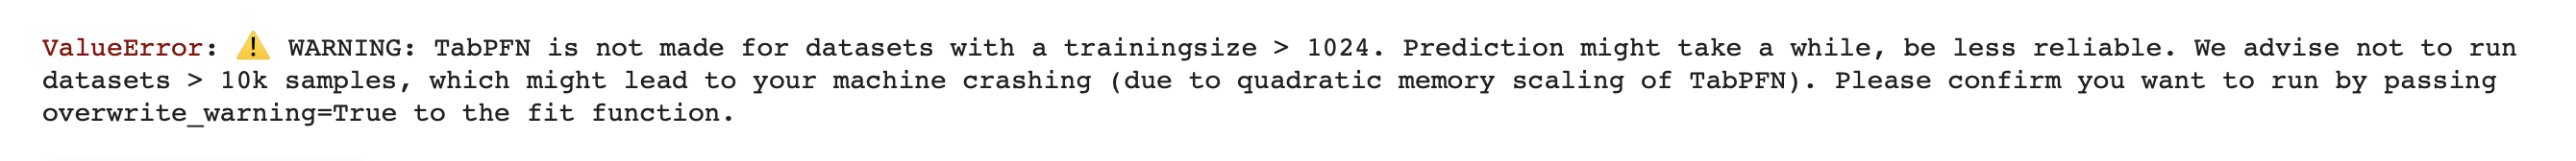

In [ ]:
openml_df.iloc[11]

did                                              13
name                                  breast-cancer
version                                           1
uploader                                          1
status                                       active
format                                         ARFF
MajorityClassSize                             201.0
MaxNominalAttDistinctValues                    11.0
MinorityClassSize                              85.0
NumberOfClasses                                 2.0
NumberOfFeatures                               10.0
NumberOfInstances                             286.0
NumberOfInstancesWithMissingValues              9.0
NumberOfMissingValues                           9.0
NumberOfNumericFeatures                         0.0
NumberOfSymbolicFeatures                       10.0
Name: 13, dtype: object

In [ ]:
openml_df.iloc[1]

did                                          3
name                                  kr-vs-kp
version                                      1
uploader                                     1
status                                  active
format                                    ARFF
MajorityClassSize                       1669.0
MaxNominalAttDistinctValues                3.0
MinorityClassSize                       1527.0
NumberOfClasses                            2.0
NumberOfFeatures                          37.0
NumberOfInstances                       3196.0
NumberOfInstancesWithMissingValues         0.0
NumberOfMissingValues                      0.0
NumberOfNumericFeatures                    0.0
NumberOfSymbolicFeatures                  37.0
Name: 3, dtype: object

In [ ]:
openml_df[openml_df['NumberOfClasses'] == 2].head(10)

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
13,13,breast-cancer,1,1,active,ARFF,201.0,11.0,85.0,2.0,10.0,286.0,9.0,9.0,0.0,10.0
15,15,breast-w,1,1,active,ARFF,458.0,2.0,241.0,2.0,10.0,699.0,16.0,16.0,9.0,1.0
24,24,mushroom,1,1,active,ARFF,4208.0,12.0,3916.0,2.0,23.0,8124.0,2480.0,2480.0,0.0,23.0
25,25,colic,1,1,active,ARFF,232.0,63.0,136.0,2.0,27.0,368.0,361.0,1927.0,7.0,20.0
27,27,colic,2,1,active,ARFF,232.0,6.0,136.0,2.0,23.0,368.0,361.0,1927.0,7.0,16.0
29,29,credit-approval,1,1,active,ARFF,383.0,14.0,307.0,2.0,16.0,690.0,37.0,67.0,6.0,10.0
31,31,credit-g,1,1,active,ARFF,700.0,10.0,300.0,2.0,21.0,1000.0,0.0,0.0,7.0,14.0
37,37,diabetes,1,1,active,ARFF,500.0,2.0,268.0,2.0,9.0,768.0,0.0,0.0,8.0,1.0


In [ ]:
dataset_binary = openml.datasets.get_dataset(4)

In [ ]:
dataset_binary

OpenML Dataset
Name..........: labor
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:30
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/4/labor.arff
OpenML URL....: https://www.openml.org/d/4
# of features.: 17
# of instances: 57

In [ ]:
X, y, categorical_indicator, attribute_names = dataset_binary.get_data(
    dataset_format="array", target=dataset_binary.default_target_attribute
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print('TabPFN')
get_acc(clf, X_train, y_train, X_test, y_test, warning_off=True)
print('-----------------')
print('XGB')
get_acc(clf_xgb, X_train, y_train, X_test, y_test)

TabPFN
Prediction time:  0.08185863494873047 	Accuracy 0.9473684210526315
-----------------
XGB
Prediction time:  0.012584447860717773 	Accuracy 0.7894736842105263


#### Multiclass

In [ ]:
dataset_multiclass = openml.datasets.get_dataset(30)

In [ ]:
dataset_multiclass

OpenML Dataset
Name..........: page-blocks
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:21:43
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/30/page-blocks.arff
OpenML URL....: https://www.openml.org/d/30
# of features.: 11
# of instances: 5473

In [ ]:
X, y, categorical_indicator, attribute_names = dataset_multiclass.get_data(
    dataset_format="array", target=dataset_multiclass.default_target_attribute
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print('TabPFN')
get_acc(clf, X_train, y_train, X_test, y_test, warning_off=True)
print('-----------------')
print('XGB')
get_acc(clf_xgb, X_train, y_train, X_test, y_test)

TabPFN
Prediction time:  1.147735834121704 	Accuracy 0.9734366353071389
-----------------
XGB
Prediction time:  0.9599413871765137 	Accuracy 0.975650249031544


In [ ]:
openml_df.iloc[25]

did                                            30
name                                  page-blocks
version                                         1
uploader                                        1
status                                     active
format                                       ARFF
MajorityClassSize                          4913.0
MaxNominalAttDistinctValues                   5.0
MinorityClassSize                            28.0
NumberOfClasses                               5.0
NumberOfFeatures                             11.0
NumberOfInstances                          5473.0
NumberOfInstancesWithMissingValues            0.0
NumberOfMissingValues                         0.0
NumberOfNumericFeatures                      10.0
NumberOfSymbolicFeatures                      1.0
Name: 30, dtype: object

In [ ]:
dataset_multi_small = openml.datasets.get_dataset(1508)

In [ ]:
dataset_multi_small

OpenML Dataset
Name..........: user-knowledge
Version.......: 1
Format........: ARFF
Upload Date...: 2015-05-25 23:22:18
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/1592300/user-knowledge.arff
OpenML URL....: https://www.openml.org/d/1508
# of features.: 6
# of instances: 403

In [ ]:
X, y, categorical_indicator, attribute_names = dataset_multi_small.get_data(
    dataset_format="array", target=dataset_multi_small.default_target_attribute
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print('TabPFN')
get_acc(clf, X_train, y_train, X_test, y_test, warning_off=True)
print('-----------------')
print('XGB')
get_acc(clf_xgb, X_train, y_train, X_test, y_test)

TabPFN
Prediction time:  0.10476899147033691 	Accuracy 0.9172932330827067
-----------------
XGB
Prediction time:  0.11290216445922852 	Accuracy 0.8721804511278195


In [ ]:
dataset_missing_values = openml.datasets.get_dataset(9)

In [ ]:
dataset_missing_values

OpenML Dataset
Name..........: autos
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:49
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/9/autos.arff
OpenML URL....: https://www.openml.org/d/9
# of features.: 26
# of instances: 205

In [ ]:
X, y, categorical_indicator, attribute_names = dataset_missing_values.get_data(
    dataset_format="array", target=dataset_missing_values.default_target_attribute
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print('TabPFN')
get_acc(clf, X_train, y_train, X_test, y_test, warning_off=True)
print('-----------------')
print('XGB')
get_acc(clf_xgb, X_train, y_train, X_test, y_test)

TabPFN
Prediction time:  0.11969161033630371 	Accuracy 0.7352941176470589
-----------------
XGB
Prediction time:  0.14699625968933105 	Accuracy 0.8235294117647058


In [ ]:
openml_df[openml_df['NumberOfFeatures'] > 50]

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
7,7,audiology,1,1,active,ARFF,57.0,24.0,1.0,24.0,70.0,226.0,222.0,317.0,0.0,70.0
12,12,mfeat-factors,1,1,active,ARFF,200.0,10.0,200.0,10.0,217.0,2000.0,0.0,0.0,216.0,1.0
14,14,mfeat-fourier,1,1,active,ARFF,200.0,10.0,200.0,10.0,77.0,2000.0,0.0,0.0,76.0,1.0
16,16,mfeat-karhunen,1,1,active,ARFF,200.0,10.0,200.0,10.0,65.0,2000.0,0.0,0.0,64.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45046,45046,Allstate_Claims_Severity,4,26324,active,arff,NaN,NaN,NaN,0.0,125.0,188318.0,0.0,0.0,15.0,110.0
45049,45049,MD_MIX_Mini_Copy,1,9186,active,arff,40.0,NaN,40.0,706.0,69.0,28240.0,28240.0,665053.0,45.0,2.0
45057,45057,jasmine,2,31892,active,arff,NaN,NaN,NaN,0.0,145.0,2984.0,0.0,0.0,9.0,136.0
45071,45071,hcdr,1,31892,active,arff,NaN,NaN,NaN,0.0,70.0,244280.0,0.0,0.0,23.0,47.0


In [ ]:
dataset_many_features = openml.datasets.get_dataset(16)

In [ ]:
dataset_many_features

OpenML Dataset
Name..........: mfeat-karhunen
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:20:30
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/16/mfeat-karhunen.arff
OpenML URL....: https://www.openml.org/d/16
# of features.: 65
# of instances: 2000

In [ ]:
X, y, categorical_indicator, attribute_names = dataset_many_features.get_data(
    dataset_format="array", target=dataset_many_features.default_target_attribute
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print('TabPFN')
get_acc(clf, X_train, y_train, X_test, y_test, warning_off=True)
print('-----------------')
print('XGB')
get_acc(clf_xgb, X_train, y_train, X_test, y_test)

TabPFN
Prediction time:  0.6892836093902588 	Accuracy 0.9696969696969697
-----------------
XGB
Prediction time:  4.4518656730651855 	Accuracy 0.9393939393939394
